In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import us
from numpy import where

plt.style.use('ggplot')

In [239]:
# Reading in Total USA COVID-19 data from NYTimes Repo
usa_covid = pd.read_csv('../../covid-19-data/us.csv')

In [240]:
usa_covid['date'] = pd.to_datetime(usa_covid['date'])

In [241]:
usa_covid.set_index('date', inplace=True)

In [242]:
usa_covid.head(5)

,cases,deaths
date,,
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,3,0


In [243]:
usa_covid.tail()

,cases,deaths
date,,
2020-10-17,8143329,219173
2020-10-18,8191211,219541
2020-10-19,8255429,220058
2020-10-20,8316027,220987
2020-10-21,8378778,222157


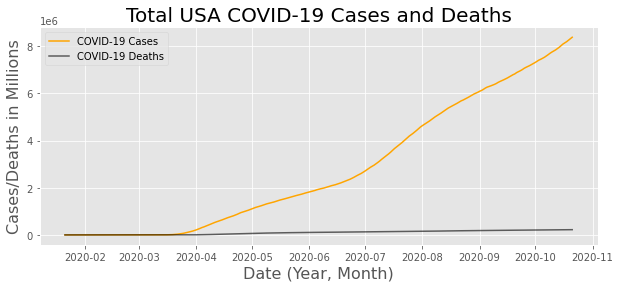

In [244]:
plt.figure(figsize=(10, 4))
plt.plot(usa_covid['cases'], label='COVID-19 Cases', color='orange')
plt.plot(usa_covid['deaths'], label='COVID-19 Deaths', color='black', alpha=.6)
plt.ylabel('Cases/Deaths in Millions', fontsize=16)
plt.xlabel('Date (Year, Month)', fontsize=16)
plt.legend()
plt.title('Total USA COVID-19 Cases and Deaths', fontsize=20)

plt.savefig('total_us_cases_deaths.png');

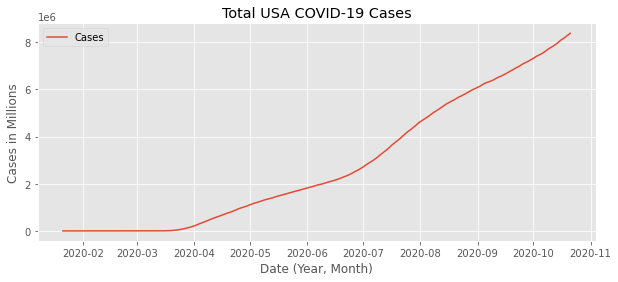

In [245]:
plt.figure(figsize=(10, 4))
plt.plot(usa_covid['cases'], label='Cases')
plt.ylabel('Cases in Millions')
plt.xlabel('Date (Year, Month)')
plt.legend()
plt.title('Total USA COVID-19 Cases')
plt.savefig('Total US Cases.png');

In [246]:
current_death_rate = usa_covid['deaths'][-1] / usa_covid['cases'][-1]
current_death_rate

0.02651424825911368

### Data by County

In [247]:
# Reading in New York Times mask use by county data.
mask = pd.read_csv('../data/mask-use-by-county.csv')

In [248]:
mask.head()
mask['STCOUNTYFP'] = mask['COUNTYFP']

In [249]:
# reading in fips data set. `us` module would have done the trick if I had found it earlier!
fips = pd.read_csv('../data/ZIP-COUNTY-FIPS_2018-03.csv')

In [250]:
fips.head()

,ZIP,STCOUNTYFP,CITY,STATE,COUNTYNAME,CLASSFP
0,36091,1001,Verbena,AL,Autauga County,H1
1,36758,1001,Plantersville,AL,Autauga County,H1
2,36006,1001,Billingsley,AL,Autauga County,H1
3,36067,1001,Prattville,AL,Autauga County,H1
4,36701,1001,Selma,AL,Autauga County,H1


In [251]:
mask.shape

(3142, 7)

In [252]:
# Selecting columns that we need to convert FIPs into county names
fips_dict = fips[['STCOUNTYFP', 'STATE', 'COUNTYNAME']]

In [253]:
# Getting rid of extraneous lines
fips_dict.drop_duplicates(inplace=True)

/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [254]:
# Merging masks with fips to id counties
counties = pd.merge(mask, fips_dict, on='STCOUNTYFP')

In [255]:
counties.drop('STCOUNTYFP', inplace=True, axis=1)

In [256]:
counties.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,STATE,COUNTYNAME
0,1001,0.053,0.074,0.134,0.295,0.444,AL,Autauga County
1,1003,0.083,0.059,0.098,0.323,0.436,AL,Baldwin County
2,1005,0.067,0.121,0.120,0.201,0.491,AL,Barbour County
3,1007,0.020,0.034,0.096,0.278,0.572,AL,Bibb County
4,1009,0.053,0.114,0.180,0.194,0.459,AL,Blount County


In [63]:
# Saving county dataframe as county.csv
counties.to_csv('./data/county.csv')

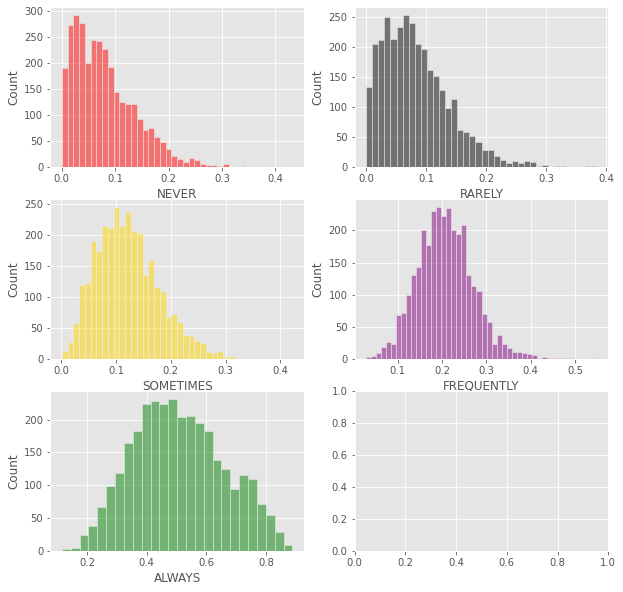

In [258]:
# EDA of distributions
fig, ax = plt.subplots(3,2, figsize=(10, 10))
sns.histplot(counties['NEVER'], color='red', alpha=.5, ax=ax[0,0])
sns.histplot(ax=ax[0,1], data=counties['RARELY'], color='black', label='Rarely', alpha=.5)
sns.histplot(ax=ax[1,0], data=counties['SOMETIMES'], color='gold', label='Sometimes',  alpha=.5)
sns.histplot(ax=ax[1,1], data=counties['FREQUENTLY'], color='purple', label = 'Frequently', alpha=.5)
sns.histplot(ax=ax[2,0], data=counties['ALWAYS'], color='green', label = 'Always', alpha=.5);

"NEVER" and "RARELY" variable are skewed right indicating a less popular option. "SOMETIMES", "FREQUENTLY" and "ALWAYS" are more normally distributed and the means are increase as mask wearing frequency increases.

**States with the highest NEVER mask score**

In [259]:
counties.groupby('STATE').mean().sort_values('NEVER', ascending=False).head(10)

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
STATE,,,,,,
ND,38053.000000,0.180981,0.164019,0.145925,0.251811,0.257245
WY,56023.000000,0.151609,0.157000,0.123000,0.232000,0.336435
MT,30056.000000,0.150857,0.171589,0.144893,0.215143,0.317536
SD,46067.430769,0.148292,0.105523,0.167108,0.218138,0.361031
MO,29117.713043,0.134061,0.127165,0.151652,0.210539,0.376557
NE,31093.000000,0.123806,0.117710,0.145753,0.261312,0.351452
KS,20105.000000,0.116886,0.116943,0.151114,0.219467,0.395590
TN,47095.000000,0.110042,0.101358,0.151958,0.209526,0.427189
IA,19099.000000,0.104323,0.117323,0.167424,0.214707,0.396202


In [260]:
# Adding two columns: mask_negative and mask_positive. Gathering positive and negative sentiment.
counties['mask_negative'] = counties['NEVER'] + counties['RARELY']
counties['mask_positive'] = counties['FREQUENTLY'] + counties['ALWAYS']

**Top 10 Mask Negative States**

In [261]:
top5_neg = counties.groupby('STATE').mean().sort_values('mask_negative', ascending=False).head(5)
top5_neg

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,mask_negative,mask_positive
STATE,,,,,,,,
ND,38053.000000,0.180981,0.164019,0.145925,0.251811,0.257245,0.345000,0.509057
MT,30056.000000,0.150857,0.171589,0.144893,0.215143,0.317536,0.322446,0.532679
WY,56023.000000,0.151609,0.157000,0.123000,0.232000,0.336435,0.308609,0.568435
MO,29117.713043,0.134061,0.127165,0.151652,0.210539,0.376557,0.261226,0.587096
SD,46067.430769,0.148292,0.105523,0.167108,0.218138,0.361031,0.253815,0.579169


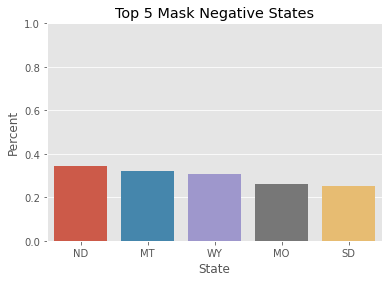

In [262]:
sns.barplot(data=top5_neg, x=top5_neg.index, y='mask_negative')
plt.title('Top 5 Mask Negative States')
plt.xlabel('State')
plt.ylabel('Percent')
plt.ylim((0, 1));
plt.savefig('Top 5 Neg.png')

**Top 10 Mask Positive States**

In [263]:
top5_pos = counties.groupby('STATE').mean().sort_values('mask_positive', ascending=False).head(5)

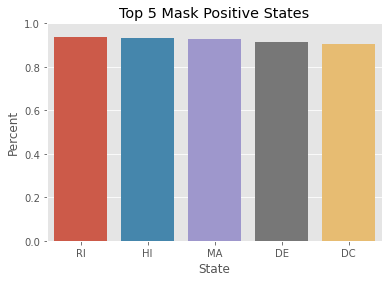

In [264]:
sns.barplot(data=top5_pos, x=top5_pos.index, y='mask_positive')
plt.title('Top 5 Mask Positive States')
plt.xlabel('State')
plt.ylabel('Percent')
plt.ylim((0, 1));
plt.savefig('Top 5 Pos.png')

**Creating a state DataFrame to work with**

In [265]:
state = counties.groupby('STATE').mean()
state = state.drop(columns=['COUNTYFP'])

In [267]:
state.head()

,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,mask_negative,mask_positive
STATE,,,,,,,
AK,0.053429,0.064643,0.092821,0.326393,0.462571,0.118071,0.788964
AL,0.081567,0.081090,0.146612,0.215343,0.475313,0.162657,0.690657
AR,0.090920,0.087253,0.138360,0.220627,0.462867,0.178173,0.683493
AZ,0.049667,0.053200,0.094667,0.147333,0.655000,0.102867,0.802333
CA,0.032310,0.030724,0.063690,0.158603,0.714638,0.063034,0.873241


In [268]:
pwd

'/Users/alexander.fioto/personal_github/project-5/alex'

In [270]:
# Saving the state DataFrame as state.csv
state.to_csv('../data/state.csv')

In [271]:
# Found good data on the 2016 election
election = pd.read_csv('../data/2016election.csv')

I was thinking that we could add this data to our mask data by state. Then we could perform analysis regarding mask sentiment and whether the state is left or right leaning. We can also explore whether a state has negative mask sentiment if they have a relatively low population. https://worldpopulationreview.com/state-rankings/2016-election-results-by-state

In [272]:
election.head(2)

,State,votesDem,percD,votesRep,percR,electoralDem,electoralRep,Pop
0,Alabama,729547,34.36,1318255,62.08,0,9,4908620
1,Alaska,116454,36.55,163387,51.28,0,3,734002


Found a cool module called 'us'. Check it out: https://github.com/unitedstates/python-us

In [273]:
# Creating a variable containing a dictionary {'state_name': 'state_abbr'}
name_abr_map = us.states.mapping('name', 'abbr')

In [274]:
election.head(2)

,State,votesDem,percD,votesRep,percR,electoralDem,electoralRep,Pop
0,Alabama,729547,34.36,1318255,62.08,0,9,4908620
1,Alaska,116454,36.55,163387,51.28,0,3,734002


In [275]:
# Should have used .map DOH! Still works
election['State'] = election['State'].apply(lambda x: name_abr_map.get(x))

In [276]:
# Missing DC @ ix 8
election.head(10)

,State,votesDem,percD,votesRep,percR,electoralDem,electoralRep,Pop
0,AL,729547,34.36,1318255,62.08,0,9,4908620
1,AK,116454,36.55,163387,51.28,0,3,734002
2,AZ,1161167,45.13,1252401,48.67,0,11,7378490
3,AR,380494,33.65,684872,60.57,0,6,3039000
4,CA,8753788,61.73,4483810,31.62,55,0,39937500
5,CO,1338870,48.16,1202484,43.25,9,0,5845530
6,CT,897572,54.57,673215,40.93,7,0,3563080
7,DE,235603,53.09,185127,41.72,3,0,982895
8,None,282830,90.48,12723,4.07,3,0,720687
9,FL,4504975,47.82,4617886,49.02,0,29,21993000


In [277]:
# Fixing the None value
election.loc[8, 'State'] = 'DC'

In [278]:
# Merging the two dataframes
state_mask_election = pd.merge(state, election, left_on='STATE', right_on='State')

In [281]:
# Checking
state_mask_election.head()

,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,mask_negative,mask_positive,State,votesDem,percD,votesRep,percR,electoralDem,electoralRep,Pop
0,0.053429,0.064643,0.092821,0.326393,0.462571,0.118071,0.788964,AK,116454,36.55,163387,51.28,0,3,734002
1,0.081567,0.081090,0.146612,0.215343,0.475313,0.162657,0.690657,AL,729547,34.36,1318255,62.08,0,9,4908620
2,0.090920,0.087253,0.138360,0.220627,0.462867,0.178173,0.683493,AR,380494,33.65,684872,60.57,0,6,3039000
3,0.049667,0.053200,0.094667,0.147333,0.655000,0.102867,0.802333,AZ,1161167,45.13,1252401,48.67,0,11,7378490
4,0.032310,0.030724,0.063690,0.158603,0.714638,0.063034,0.873241,CA,8753788,61.73,4483810,31.62,55,0,39937500


In [282]:
# Creating blue and red column. 
state_mask_election['blue'] = where(state_mask_election['electoralDem'] > 0, 1, 0)
state_mask_election['red'] = where(state_mask_election['electoralRep'] > 0, 1, 0)

In [283]:
state_mask_election.head(2)

,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,mask_negative,mask_positive,State,votesDem,percD,votesRep,percR,electoralDem,electoralRep,Pop,blue,red
0,0.053429,0.064643,0.092821,0.326393,0.462571,0.118071,0.788964,AK,116454,36.55,163387,51.28,0,3,734002,0,1
1,0.081567,0.081090,0.146612,0.215343,0.475313,0.162657,0.690657,AL,729547,34.36,1318255,62.08,0,9,4908620,0,1


In [285]:
# Saving the new state_mask_election DataFrame as sme.csv 
state_mask_election.to_csv('../data/sme.csv')

state_mask_election == sme.csv

In [286]:
df = pd.read_csv('../vivian_fork/combined_political_covid_percent.csv', index_col=0)

In [287]:
df.describe()

,never,rarely,sometimes,frequently,always,mask_negative,mask_positive,votesdem,percd,votesrep,percr,electoraldem,electoralrep,pop,blue,red,deaths,cases,percent change deaths,percent change cases
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01,51.000000,5.100000e+01,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.069624,0.073096,0.107390,0.197280,0.552620,0.142719,0.749901,1.291245e+06,44.694314,1.234997e+06,48.355490,4.431373,5.882353,6.496455e+06,0.411765,0.588235,1101.196078,65846.039216,0.997377,1.917284
std,0.041711,0.041871,0.038227,0.042925,0.150673,0.082301,0.117069,1.548085e+06,12.153134,1.142383e+06,11.931855,9.302161,7.752798,7.450662e+06,0.497050,0.497050,2009.724558,109108.202685,1.012037,2.080539
min,0.012000,0.006667,0.033400,0.095667,0.257245,0.021800,0.509057,5.597300e+04,21.630000,1.272300e+04,4.070000,0.000000,0.000000,5.670250e+05,0.000000,0.000000,2.000000,425.000000,0.000000,0.103987
25%,0.037282,0.044126,0.076053,0.167328,0.430345,0.081218,0.661177,2.975850e+05,35.900000,3.774225e+05,40.965000,0.000000,0.000000,1.802115e+06,0.000000,0.000000,126.000000,8049.500000,0.166279,0.620927
50%,0.055254,0.071314,0.109283,0.201250,0.532826,0.133143,0.776851,7.801540e+05,46.170000,9.491360e+05,48.670000,0.000000,3.000000,4.499690e+06,0.000000,1.000000,420.000000,39651.000000,0.621429,1.357136
75%,0.095100,0.101531,0.144833,0.219478,0.664936,0.191597,0.829154,1.810340e+06,51.305000,1.575898e+06,57.380000,5.500000,9.000000,7.587795e+06,1.000000,1.000000,1099.500000,61654.500000,1.434971,2.293879
max,0.180981,0.171589,0.167424,0.326393,0.817667,0.345000,0.938000,8.753788e+06,90.480000,4.685047e+06,68.500000,55.000000,36.000000,3.993750e+07,1.000000,1.000000,10486.000000,476864.000000,4.164416,11.423913


In [288]:
df.head()
# cases / population

,state,never,rarely,sometimes,frequently,always,mask_negative,mask_positive,votesdem,percd,...,percr,electoraldem,electoralrep,pop,blue,red,deaths,cases,percent change deaths,percent change cases
0,AK,0.053429,0.064643,0.092821,0.326393,0.462571,0.118071,0.788964,116454,36.55,...,51.28,0,3,734002,0,1,24,4935,1.263374,2.275397
1,AL,0.081567,0.081090,0.146612,0.215343,0.475313,0.162657,0.690657,729547,34.36,...,62.08,0,9,4908620,0,1,1228,88654,2.000000,4.203578
2,AR,0.090920,0.087253,0.138360,0.220627,0.462867,0.178173,0.683493,380494,33.65,...,60.57,0,6,3039000,0,1,537,40300,1.924681,1.404875
3,AZ,0.049667,0.053200,0.094667,0.147333,0.655000,0.102867,0.802333,1161167,45.13,...,48.67,0,11,7378490,0,1,3322,118223,1.938628,1.901212
4,CA,0.032310,0.030724,0.063690,0.158603,0.714638,0.063034,0.873241,8753788,61.73,...,31.62,55,0,39937500,1,0,6981,476864,1.131809,1.988889


In [291]:
# Creating per capita columns
df['cases_per_capita'] = df['cases'] / df['pop']
df['deaths_per_capita'] = df['deaths'] / df['pop']

Tested on capita columns and didn't find much different results.

In [93]:
# Optional function to create columns that scale the data
# def population_scale(df):
#     columns=['never', 'rarely', 'sometimes', 'frequently', 'always']
#     for column in columns:
#         df[f'{column}_count'] = df[column] * df['pop']
        

In [293]:
# Saving my final dataframe
df.to_csv('../data/final_alex_eda_dataframe.csv')

# Modeling

In [128]:
import statsmodels.api as sm

In [142]:
X = df['mask_positive']
y = df['percent change cases']
#X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

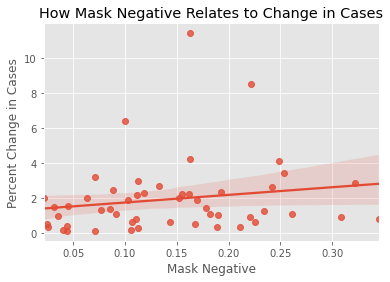

In [199]:
sns.regplot(data = df, x='mask_negative', y='percent change cases')
plt.xlabel('Mask Negative')
plt.ylabel('Percent Change in Cases')
plt.title('How Mask Negative Relates to Change in Cases');
plt.savefig('neg_mask_cases.png')

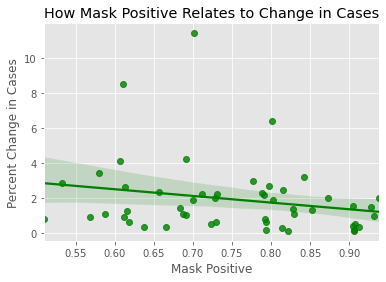

In [200]:
sns.regplot(data = df, x='mask_positive', y='percent change cases', color='green')
plt.xlabel('Mask Positive')
plt.ylabel('Percent Change in Cases')
plt.title('How Mask Positive Relates to Change in Cases')
plt.savefig('pos_mask_cases.png');

<AxesSubplot:xlabel='percent change cases', ylabel='pop'>

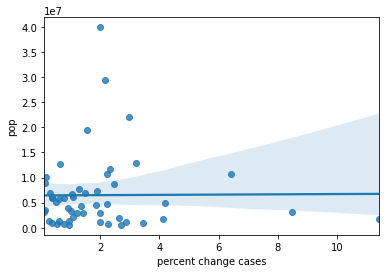

In [35]:
sns.regplot(data = df, x='percent change cases', y='pop')

In [36]:
df.head()

,state,never,rarely,sometimes,frequently,always,mask_negative,mask_positive,votesdem,percd,...,percr,electoraldem,electoralrep,pop,blue,red,deaths,cases,percent change deaths,percent change cases
0,AK,0.053429,0.064643,0.092821,0.326393,0.462571,0.118071,0.788964,116454,36.55,...,51.28,0,3,734002,0,1,24,4935,1.263374,2.275397
1,AL,0.081567,0.081090,0.146612,0.215343,0.475313,0.162657,0.690657,729547,34.36,...,62.08,0,9,4908620,0,1,1228,88654,2.000000,4.203578
2,AR,0.090920,0.087253,0.138360,0.220627,0.462867,0.178173,0.683493,380494,33.65,...,60.57,0,6,3039000,0,1,537,40300,1.924681,1.404875
3,AZ,0.049667,0.053200,0.094667,0.147333,0.655000,0.102867,0.802333,1161167,45.13,...,48.67,0,11,7378490,0,1,3322,118223,1.938628,1.901212
4,CA,0.032310,0.030724,0.063690,0.158603,0.714638,0.063034,0.873241,8753788,61.73,...,31.62,55,0,39937500,1,0,6981,476864,1.131809,1.988889


In [116]:
X = df[['never_count', 'rarely_count', 'sometimes_count', 'frequently_count', 'always_count', 'votesdem', 'votesrep', 'electoraldem', 'electoralrep', 'pop', 'deaths', 'cases']]

y = df['percent change cases']

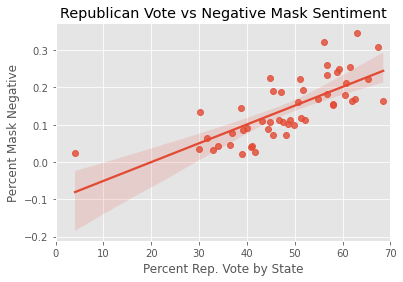

In [180]:
sns.regplot(data=df, x='percr', y='mask_negative', label='Significance=.004')
plt.ylabel('Percent Mask Negative')
plt.xlabel('Percent Rep. Vote by State')
plt.xlim(0, 70)
plt.title('Republican Vote vs Negative Mask Sentiment')
#plt.legend();
plt.savefig('republican_mask')

In [145]:
X = df['percr']
y = df['mask_negative']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          mask_negative   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     56.26
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           1.12e-09
Time:                        18:15:12   Log-Likelihood:                 75.003
No. Observations:                  51   AIC:                            -146.0
Df Residuals:                      49   BIC:                            -142.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1011      0.033     -3.022      0.004      -0.168      -0.034
percr          0.0050      0.001      7.501      0.000       0.004       0.006
==============================================================================
Omnibus:                        4.552   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                4.440
Skew:                           0.699   Prob(JB):                        0.109
Kurtosis:                       2.634   Cond. No.                         210.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
df.head()

,state,never,rarely,sometimes,frequently,always,mask_negative,mask_positive,votesdem,percd,...,percr,electoraldem,electoralrep,pop,blue,red,deaths,cases,percent change deaths,percent change cases
0,AK,0.053429,0.064643,0.092821,0.326393,0.462571,0.118071,0.788964,116454,36.55,...,51.28,0,3,734002,0,1,24,4935,1.263374,2.275397
1,AL,0.081567,0.081090,0.146612,0.215343,0.475313,0.162657,0.690657,729547,34.36,...,62.08,0,9,4908620,0,1,1228,88654,2.000000,4.203578
2,AR,0.090920,0.087253,0.138360,0.220627,0.462867,0.178173,0.683493,380494,33.65,...,60.57,0,6,3039000,0,1,537,40300,1.924681,1.404875
3,AZ,0.049667,0.053200,0.094667,0.147333,0.655000,0.102867,0.802333,1161167,45.13,...,48.67,0,11,7378490,0,1,3322,118223,1.938628,1.901212
4,CA,0.032310,0.030724,0.063690,0.158603,0.714638,0.063034,0.873241,8753788,61.73,...,31.62,55,0,39937500,1,0,6981,476864,1.131809,1.988889


In [207]:
X = df['mask_positive']
y = df['cases']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.3713
Date:                Thu, 29 Oct 2020   Prob (F-statistic):              0.545
Time:                        17:05:39   Log-Likelihood:                -663.27
No. Observations:                  51   AIC:                             1331.
Df Residuals:                      49   BIC:                             1334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5235.1016   1.01e+05      0.052      0.959   -1.97e+05    2.07e+05
mask_positive  8.083e+04   1.33e+05      0.609      0.545   -1.86e+05    3.47e+05
==============================================================================
Omnibus:                       54.426   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.762
Skew:                           3.021   Prob(JB):                     2.86e-51
Kurtosis:                      11.546   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
df.sort_values(by='mask_positive', ascending=False)

,state,never,rarely,sometimes,frequently,always,mask_negative,mask_positive,votesdem,percd,...,percr,electoraldem,electoralrep,pop,blue,red,deaths,cases,percent change deaths,percent change cases
39,RI,0.012200,0.009600,0.040000,0.136000,0.802000,0.021800,0.938000,252525,54.41,...,38.90,4,0,1056160,1,0,94,5149,1.213270,1.989023
11,HI,0.016200,0.018800,0.033400,0.116600,0.815000,0.035000,0.931600,266891,62.22,...,30.03,3,0,1412690,1,0,55,7719,1.333333,0.948387
19,MA,0.019500,0.011786,0.040143,0.131143,0.797286,0.031286,0.928429,1995196,60.01,...,32.81,11,0,6976600,1,0,983,19745,0.539222,1.481223
8,DE,0.019333,0.006667,0.060667,0.095667,0.817667,0.026000,0.913333,235603,53.09,...,41.72,3,0,982895,1,0,96,6025,0.097649,0.355427
7,DC,0.012000,0.013000,0.069000,0.164000,0.743000,0.025000,0.907000,282830,90.48,...,4.07,3,0,720687,1,0,54,3684,0.188605,0.523458
31,NJ,0.022905,0.021238,0.049429,0.157905,0.748429,0.044143,0.906333,2148278,54.99,...,41.00,14,0,8936570,1,0,872,20288,0.057833,0.116744
6,CT,0.017500,0.023000,0.053625,0.126375,0.779500,0.040500,0.905875,897572,54.57,...,40.93,7,0,3563080,1,0,142,6434,0.032840,0.138152
34,NY,0.022839,0.022452,0.049387,0.135274,0.769935,0.045290,0.905210,4556124,59.01,...,36.52,29,0,19440500,1,0,760,41467,0.993521,1.543830
20,MD,0.022917,0.020917,0.051542,0.161833,0.742750,0.043833,0.904583,1677928,60.33,...,33.91,10,0,6083120,1,0,556,40851,0.257143,0.380692
4,CA,0.032310,0.030724,0.063690,0.158603,0.714638,0.063034,0.873241,8753788,61.73,...,31.62,55,0,39937500,1,0,6981,476864,1.131809,1.988889


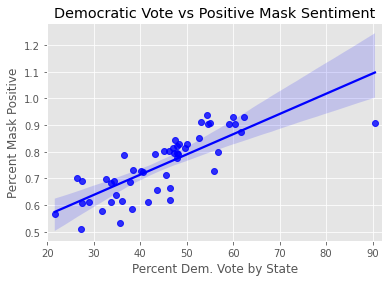

In [190]:
sns.regplot(data=df, x='percd', y='mask_positive', color='blue', label='')
plt.ylabel('Percent Mask Positive')
plt.xlabel('Percent Dem. Vote by State')
plt.xlim(20, 92)
plt.title('Democratic Vote vs Positive Mask Sentiment')
#plt.legend();
plt.savefig('democrat_mask.png')

In [183]:
X = df['percd']
y = df['mask_positive']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          mask_positive   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     79.76
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           7.47e-12
Time:                        18:35:24   Log-Likelihood:                 62.171
No. Observations:                  51   AIC:                            -120.3
Df Residuals:                      49   BIC:                            -116.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.039     10.461      0.0

In [40]:
df[(df['mask_negative'] < .05) & (df['percr'] < 10)]

,state,never,rarely,sometimes,frequently,always,mask_negative,mask_positive,votesdem,percd,...,percr,electoraldem,electoralrep,pop,blue,red,deaths,cases,percent change deaths,percent change cases


<AxesSubplot:xlabel='mask_positive', ylabel='percd'>

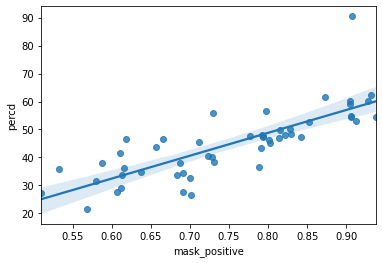

In [39]:
sns.regplot(data=df, x='mask_positive', y='percd')

In [105]:
from sklearn.linear_model import LinearRegression

from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [106]:
lr = LinearRegression()
ridge = Ridge()
ss = StandardScaler()

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .15)

In [108]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [109]:
ridge.fit(X_train_scaled, y_train)

Ridge()

In [110]:
ridge.score(X_test_scaled, y_test)

0.0013949768823303677

In [58]:
ols = OLS(y, X).fit()
print(ols.summary())

                                  OLS Regression Results                                 
Dep. Variable:     percent change cases   R-squared (uncentered):                   0.555
Model:                              OLS   Adj. R-squared (uncentered):              0.418
Method:                   Least Squares   F-statistic:                              4.055
Date:                  Thu, 15 Oct 2020   Prob (F-statistic):                    0.000427
Time:                          17:47:27   Log-Likelihood:                         -104.48
No. Observations:                    51   AIC:                                      233.0
Df Residuals:                        39   BIC:                                      256.1
Df Model:                            12                                                  
Covariance Type:              nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [59]:
df['percent change cases'].mean()

1.9172837762144603

In [113]:
X = df['never_count', 'rarely_count', 'sometimes_count', 'frequently_count', 'always_count', 'votesdem', 'votesrep', 'electoraldem', 'electoralrep', 'pop', 'deaths', 'cases']
y = df['percent change cases']

KeyError: ('never_count', 'rarely_count', 'sometimes_count', 'frequently_count', 'always_count', 'votesdem', 'votesrep', 'electoraldem', 'electoralrep', 'pop', 'deaths', 'cases')

In [135]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
import numpy as np
from keras.optimizers import Adam


In [126]:
X_arr = X.to_numpy()
X_arr.shape

(51, 12)

In [137]:
model = Sequential()
model.add(Dense(64, input_shape=(X_arr.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))


In [138]:
model.compile(optimizer = 'adam',
              loss = 'mse',
              metrics=['mae']
          )

In [139]:
history = model.fit(X_arr, y,
                    validation_split=.15,
                    batch_size=16,
                    epochs=100
)

Epoch 1/100
3/3 [==============================] - 0s 36ms/step - loss: 5.4229 - mae: 1.6170 - val_loss: 18.9676 - val_mae: 2.7134
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 3.9579 - mae: 1.3276 - val_loss: 20.0610 - val_mae: 2.8373
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 3.5722 - mae: 1.2847 - val_loss: 24.3337 - val_mae: 3.3231
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 3.4980 - mae: 1.2032 - val_loss: 29.7445 - val_mae: 3.7317
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 3.0607 - mae: 1.2575 - val_loss: 31.2284 - val_mae: 3.7725
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 2.9199 - mae: 1.0926 - val_loss: 30.4345 - val_mae: 3.6614
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 2.8376 - mae: 1.1581 - val_loss: 27.8641 - val_mae: 3.4299
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 3.2854 - mae: 1.23

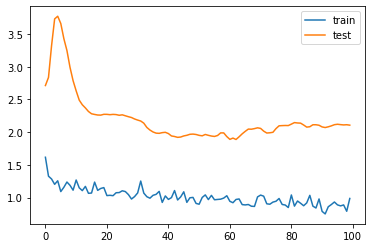

In [143]:
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.legend();

In [144]:
model.predict(1)

IndexError: list index out of range